In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir("HD_eventprop_output")

In [3]:
with open('hidden_spike_counts.npy', 'rb') as f:

    hidden_spike_counts = np.load(f)

In [4]:
len(hidden_spike_counts)

409600

In [5]:
# plot mean spikes per epoch
epochs = 50
samples_per_epoch = int(len(hidden_spike_counts) / epochs) #epochs
mean_spikes_per_epoch = []
mean_min, mean_max = [], []
std_spikes_per_epoch = []

for e in range(epochs):
    total_number_of_spikes = []
    min = np.sum(hidden_spike_counts[(e * samples_per_epoch)])
    max = np.sum(hidden_spike_counts[(e * samples_per_epoch)])
    
    for s in range(samples_per_epoch):
        no_of_spikes = np.sum(hidden_spike_counts[(e * samples_per_epoch) + s])
        
        if no_of_spikes > max:
            max = no_of_spikes
        if no_of_spikes < min:
            min = no_of_spikes                              
                              
        total_number_of_spikes.append(np.sum(hidden_spike_counts[(e * samples_per_epoch) + s]))
        
    mean_spikes_per_epoch.append(np.sum(total_number_of_spikes) / samples_per_epoch)
    mean_min.append(min)
    mean_max.append(max)
    std_spikes_per_epoch.append(np.std(total_number_of_spikes))
    

In [6]:
np.min(mean_max)

581

In [7]:
for i in range(10):
    print(mean_min[i], mean_max[i])
    
y_error = np.absolute([mean_min, mean_max])

0 581
0 793
0 979
0 1111
0 1191
0 1324
0 1521
0 1548
0 1681
0 1751


In [8]:
print(y_error)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [ 581  793  979 1111 1191 1324 1521 1548 1681 1751 1820 1946 2023 2098
  2162 2218 2246 2288 2329 2380 2401 2433 2442 2470 2476 2522 2515 2541
  2547 2585 2587 2591 2619 2638 2646 2672 2696 2696 2725 2732 2751 2776
  2772 2766 2745 2743 2754 2757 2751 2736]]


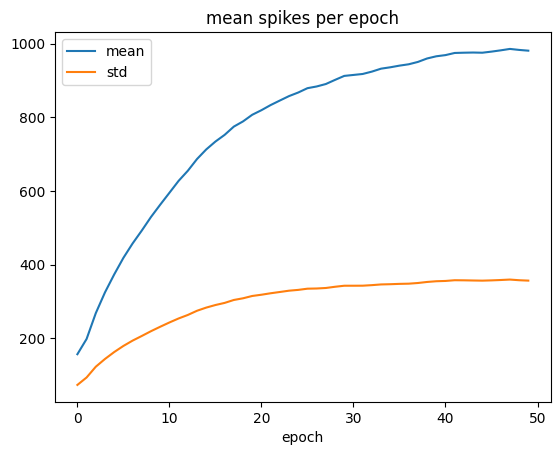

In [9]:
plt.plot(mean_spikes_per_epoch, label = "mean")
plt.plot(std_spikes_per_epoch, label = "std")
plt.xlabel("epoch")
plt.legend()
plt.title("mean spikes per epoch")
plt.show()